## Reading in Data & Importing Lib

### Set up Dir

In [ ]:
import sys, os
if 'google.colab' in sys.modules:

    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/School stuff/Y4 S1/DSA4264'

    # move to Google Drive directory
    os.chdir(path_to_file)

Mounted at /content/gdrive


### Install Packages

### Import Lib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go

import re,nltk
import string
import gensim

from transformers import AutoTokenizer
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from plotly.subplots import make_subplots

### Downloads

### Read in Data

In [ ]:
Data1 = pd.read_csv('../data/Data_1.csv', engine = 'python')
Data2 = pd.read_csv('../data/Data_2.csv', engine = 'python')
Data3 = pd.read_csv('../data/Data_3.csv', engine = 'python')
Data4 = pd.read_csv('../data/Data_4.csv', engine = 'python')
Data5 = pd.read_csv('../data/Data_5.csv', engine = 'python')
Data6 = pd.read_csv('../data/Data_6.csv', engine = 'python')
Data7 = pd.read_csv('../data/Data_7.csv', engine = 'python')

### Merge Data

In [ ]:
Data = pd.concat([Data1, Data2, Data3, Data4, Data5, Data6, Data7], ignore_index=True, axis=0)

Data = Data.drop(columns=['Unnamed: 0'])

In [ ]:
del Data1, Data2, Data3, Data4, Data5, Data6, Data7

### Datatypes

In [ ]:
Data['timestamp']= pd.to_datetime(Data['timestamp'])
Data['post_timestamp']= pd.to_datetime(Data['timestamp'])

## Data

In [ ]:
Data

,text,timestamp,username,link,link_id,parent_id,text_id,subreddit_id,moderation,BERT_2_hate,subreddit,post_id,post_timestamp,post_title,author,author_id,comment_count,vote_score,post_title_cleaned,rake_keywords
0,STI chiong ah,2020-05-14 12:35:30,iamabear1,/r/singapore/comments/gjjem5/covid19_8663_busi...,t3_gjjem5,t3_gjjem5,fqljinp,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",True,r/Singapore,gjjem5,2020-05-14 12:35:30,"Covid-19: 8,663 businesses in S'pore closed do...",Not Found,Not Found,4.0,30.0,covid businesses in closed down in april hi...,"['covid businesses', 'april highest', 'years',..."
1,Look on the bright side - you'll never make th...,2020-02-09 17:23:24,lkc159,/r/singapore/comments/f15aks/did_i_just_get_sc...,t3_f15aks,t3_f15aks,fh3hl0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,r/Singapore,f15aks,2020-02-09 17:23:24,Did I just get scammed,Not Found,Not Found,42.0,50.0,did i just get scammed,['get scammed']
2,"For posts flaired as such (by OP), we will be ...",2021-04-06 18:08:59,AutoModerator,/r/singapore/comments/maajuo/a_compilation_of_...,t3_maajuo,t3_maajuo,gtlh5uf,t5_2qh8c,"{'collapsed_reason': None, 'author_is_blocked'...",True,r/Singapore,maajuo,2021-04-06 18:08:59,A compilation of mental health/wellness resour...,Not Found,Not Found,45.0,301.0,a compilation of mental healthwellness resourc...,"['mental healthwellness resources', 'please ad..."
3,sounds q fucked up if no concern for each othe...,2021-01-22 14:22:42,[deleted],/r/singapore/comments/l28wfr/rsingapore_random...,t3_l28wfr,t1_gk6fcys,gk6gc0y,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",True,r/Singapore,l28wfr,2021-01-22 14:22:42,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,2270.0,13.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio..."
4,Chinese media reported a while ago: https://ww...,2020-03-26 04:51:22,localinfluenza,/r/singapore/comments/fp5hgu/pcf_cluster_anoth...,t3_fp5hgu,t3_fp5hgu,flj42mf,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,r/Singapore,fp5hgu,2020-03-26 04:51:22,PCF Cluster: Another teacher diagnosed with Co...,Not Found,Not Found,21.0,9.0,pcf cluster another teacher diagnosed with cov...,"['pcf cluster another teacher diagnosed', 'fee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509967,Its fuckin hot rn,2022-05-25 04:22:50,Mahsunon,/r/singapore/comments/ux28gq/rsingapore_random...,t3_ux28gq,t1_i9waspv,i9wb51x,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",True,r/Singapore,ux28gq,2022-05-25 04:22:50,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,969.0,8.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio..."
4509968,"hey, sending hugs your way &lt;3",2022-09-29 14:05:32,_0_o,/r/singapore/comments/xqprla/rsingapore_random...,t3_xqprla,t1_iqcvjsd,iqd9twj,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",False,r/Singapore,xqprla,2022-09-29 14:05:32,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,437.0,9.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio..."
4509969,Depends in the speed they got caught doing. In...,2023-03-27 01:00:34,dodgethis_sg,/r/singapore/comments/1235s44/eli5_why_do_the_...,t3_1235s44,t3_1235s44,jdtcn3x,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",False,r/Singapore,1235s44,2023-03-27 01:00:34,[ELI5] Why do the traffic police let offenders...,Not Found,Not Found,26.0,0.0,eli why do the traffic police let offenders go...,"['traffic police let offenders go without', 'e..."
4509970,Maybe I should have typed ‘doesn’t change too ...,2023-04-29 04:43:31,ShadeX8,/r/singapore/comments/130dj90/latest_property_...,t3_130dj90,t1_ji5arfa,ji5d2nc,t5_2qh8c,"{'banned_at_utc': None, 'mod_reason_by': None,...",False,r/Singapore,130dj90,2023-04-

## Tab 1: Subreddit Post Analysis



### Left: Word Cloud of Top 1000 Post Titles with most Hate Comments for each Subreddit (ALWAYS DISPLAY)

In [ ]:
# Filter for toxic comments
toxic_comments = Data[Data['BERT_2_hate'] == True]

# Exclude specific post_titles for r/Singapore
# Change: Use 'fillna(False)' to replace NaN with False before applying ~
exclude_condition = Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for').fillna(False)
Data_filtered = Data[~(Data['subreddit'] == 'r/Singapore') | ~exclude_condition]

# Group by post_id and subreddit to count toxic comments
post_toxic_counts = toxic_comments.groupby(['post_id', 'subreddit']).size().reset_index(name='toxic_comment_count')

# Sort and get top 100 posts for each subreddit
top_posts = post_toxic_counts.sort_values(['subreddit', 'toxic_comment_count'], ascending=[True, False])

# Get the top 100 posts for each subreddit
top_posts = top_posts.groupby('subreddit').head(1000)

# Merge back to get the post titles and RAKE keywords
top_posts = top_posts.merge(Data[['post_id', 'post_title', 'rake_keywords','post_title_cleaned']], on='post_id', how='left')

# Remove duplicates based on 'subreddit' and 'post_title'
top_posts = top_posts.drop_duplicates(subset=['subreddit', 'post_title'])

# Final filtering to exclude specific post titles for r/Singapore
top_posts = top_posts[~((top_posts['subreddit'] == 'r/Singapore') &
                                  (top_posts['post_title'].str.startswith('/r/singapore random discussion and small questions thread for')))]

# Display the result
top_posts[['subreddit', 'post_title','post_title_cleaned', 'rake_keywords', 'toxic_comment_count']]

<ipython-input-33-b8e712df51a3>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exclude_condition = Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for').fillna(False)


,subreddit,post_title,post_title_cleaned,rake_keywords,toxic_comment_count
0,r/Singapore,Singapore General Elections 2020 Polling Resul...,general elections polling results live threa...,['general elections polling results live threa...,3320
82149,r/Singapore,I’m so sick of it,im so sick of it,"['sick', 'im']",626
110461,r/Singapore,Someone is attacked on MRT.,someone is attacked on mrt,"['someone', 'mrt', 'attacked']",584
113258,r/Singapore,"No dining in, social group sizes cut to 2 from...",no dining in social group sizes cut to from j...,"['social group sizes cut', 'returns', 'phase',...",581
131672,r/Singapore,Don't pick fights with people bigger than you,dont pick fights with people bigger than you,"['dont pick fights', 'people bigger']",570
...,...,...,...,...,...
1252535,r/SingaporeRaw,Anybody else feel like it’s over?,anybody else feel like its over,['anybody else feel like'],40
1252622,r/SingaporeRaw,When patriotic Chinese receive Singapore citiz...,when patriotic chinese receive citizenship,['patriotic chinese receive citizenship'],40
1252707,r/SingaporeRaw,I think i fall in love with a Massage lady,i think i fall in love with a massage lady,"['massage lady', 'think', 'love', 'fall']",40
1252797,r/SingaporeRaw,Dating app scene these days,dating app scene these days,"['dating app scene', 'days']",40


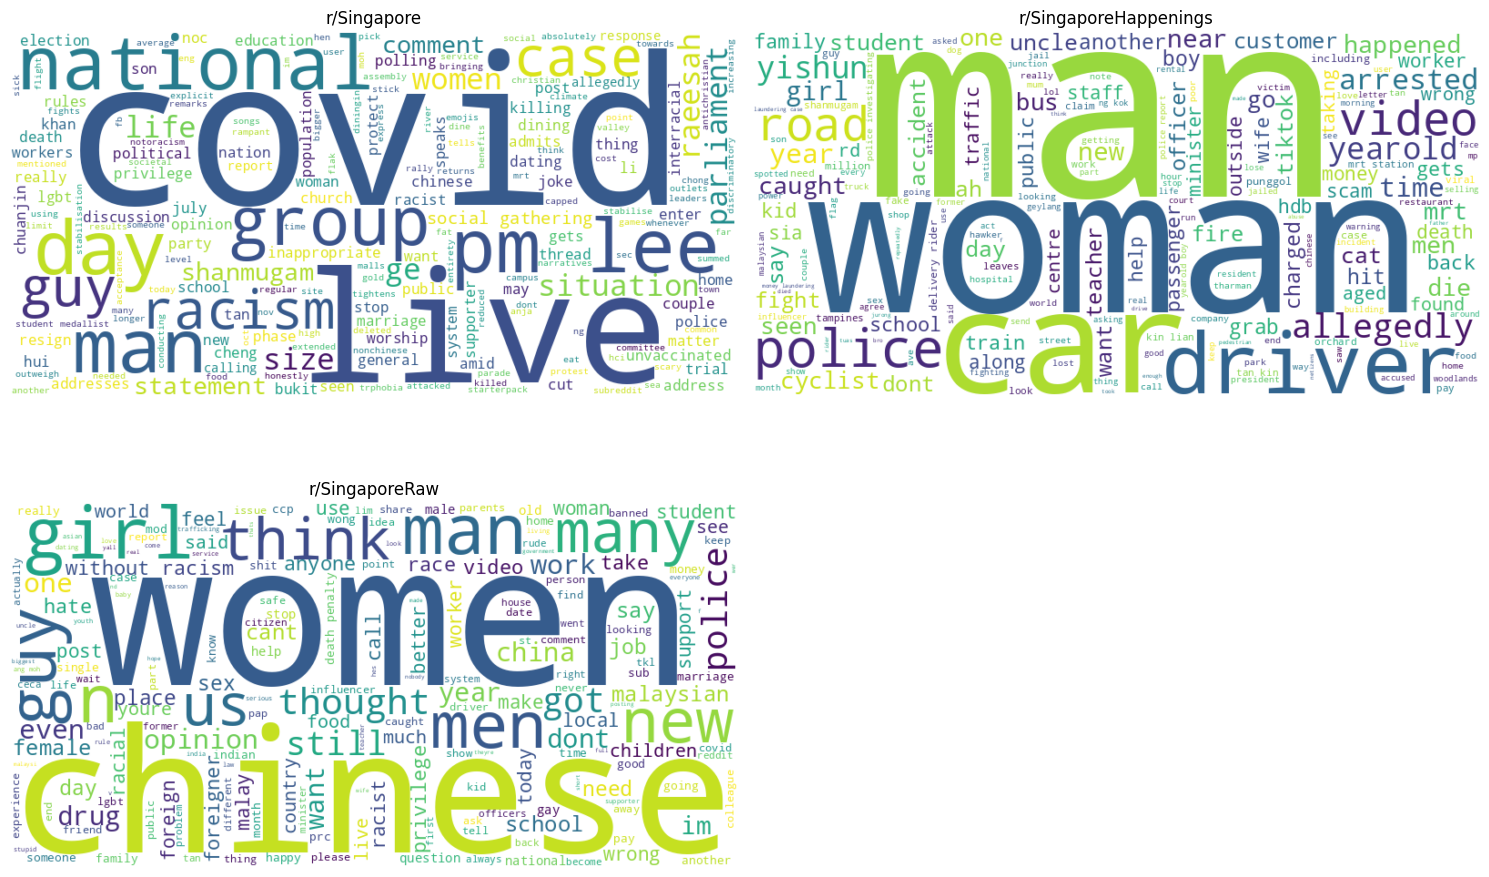

In [ ]:
# Define the patterns to replace as a dictionary {pattern: replacement}
replacements = {
    r'\bs\b': '',
    r'\bu\b': '',
    "'": '',
    'people': '',
    'megathread': '',
    'ans': '',
    'says':'',
    'told':'',
    'whats':'',
    'alledgedly':'',
    'year old':''
}

# Apply all replacements to rake_keywords
top_posts['rake_keywords'] = top_posts['rake_keywords'].fillna('').replace(replacements, regex=True)

# Group by subreddit and aggregate keywords into a single string per subreddit
subreddit_keywords = top_posts.groupby('subreddit')['rake_keywords'].apply(lambda x: ' '.join(x)).reset_index()

# Generate and plot word clouds for each subreddit
plt.figure(figsize=(15, 10))

for i, row in subreddit_keywords.iterrows():
    subreddit = row['subreddit']
    keywords = row['rake_keywords']

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)

    # Plotting
    plt.subplot(2, 2, i + 1)  # Adjust this according to the number of subreddits
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(subreddit)

plt.tight_layout()
plt.show()


### Center: List of Top 20 Post Titles with most/hate Comments given Time (INPUT)

In [ ]:
# Ensure 'post_timestamp' is in datetime format
Data['post_timestamp'] = pd.to_datetime(Data['post_timestamp'], errors='coerce')

# Filter for posts in May 2023 and BERT_2_hate == True
filtered_data = Data[(Data['post_timestamp'].dt.month == 5) &
                     (Data['post_timestamp'].dt.year == 2023) &
                     (Data['BERT_2_hate'] == True)]

# Remove posts where 'post_title' starts with "/r/singapore random discussion and small questions thread for"
# Also remove posts where 'post_title' is '[deleted by user]'
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for', na=False)]
filtered_data = filtered_data[filtered_data['post_title'] != '[deleted by user]']

# Group by subreddit and post_id, then count the number of BERT_2_hate == True comments for each post
post_toxic_counts = filtered_data.groupby(['subreddit', 'post_title', 'post_title_cleaned', 'rake_keywords']).size().reset_index(name='toxic_comment_count')

# Sort by 'subreddit' and 'toxic_comment_count' in descending order, to get the top posts for each subreddit
top_posts = post_toxic_counts.sort_values(['subreddit', 'toxic_comment_count'], ascending=[True, False])

# Get the top 20 posts for each subreddit
top_20_posts_per_subreddit = top_posts.groupby('subreddit').head(20)

# Display the result
top_20_posts_per_subreddit

,subreddit,post_title,post_title_cleaned,rake_keywords,toxic_comment_count
654,r/Singapore,"S'porean man convicted of trafficking 1,562.97...",an man convicted of trafficking g of cannabis ...,"['trafficking g', 'man convicted', 'cannabis e...",220
66,r/Singapore,A review of Blackpink’s Singapore Leg of Born ...,a review of blackpinks leg of born pink,"['born pink', 'blackpinks leg', 'review']",183
271,r/Singapore,Former Wah!Banana actor on trial for raping wo...,former wahbanana actor on trial for raping wom...,"['former wahbanana actor', 'raping woman', 'tr...",175
943,r/Singapore,What’s something that is extremely ridiculous ...,whats something that is extremely ridiculous t...,"['youve heard', 'whats something', 'extremely ...",160
325,r/Singapore,Heart of the Matter -Why do young people think...,heart of the matter why do young people think ...,"['young people think cannabis', 'less harmful ...",144
481,r/Singapore,Men in Singapore are the least likely to sit d...,men in are the least likely to sit down to pee,"['least likely', 'sit', 'pee', 'men']",138
653,r/Singapore,S'porean couple denied entry to M'sia after qu...,an couple denied entry to msia after questioni...,['questioning custom officers passport choppin...,138
679,r/Singapore,SQ207 SIN to MEL breakfast. Pathetic siol,sq sin to mel breakfast pathetic siol,"['mel breakfast pathetic siol', 'sq sin']",132
381,r/Singapore,Is 'Cancel culture' really that big of a deal ...,is cancel culture really that big of a deal th...,"['cancel culture really', 'government needs', ...",108
454,r/Singapore,Man admits he drugged wife and had her raped b...,man admits he drugged wife and had her raped b...,"['fulfil wifesharing fantasies', 'man admits',...",107


### Right: List of Post Titles with most Votes given Time (INPUT)

In [ ]:
# Ensure 'post_timestamp' is in datetime format
Data['post_timestamp'] = pd.to_datetime(Data['post_timestamp'], errors='coerce')

# Filter for posts in May 2023
filtered_data = Data[(Data['post_timestamp'].dt.month == 5) &
                     (Data['post_timestamp'].dt.year == 2023)]

# Remove posts where 'post_title' starts with "/r/singapore random discussion and small questions thread for"
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for', na=False)]

# Drop duplicates based on 'subreddit' and 'post_title' (we want unique post_titles for each subreddit)
filtered_data_unique = filtered_data.drop_duplicates(subset=['subreddit', 'post_title'])

# Sort by 'subreddit' and 'vote_score' in descending order
filtered_data_sorted = filtered_data_unique.sort_values(['subreddit', 'vote_score'], ascending=[True, False])

# Get the top 20 posts for each subreddit based on the highest vote_score
top_20_posts_per_subreddit = filtered_data_sorted.groupby('subreddit').head(20)

# Display the result
top_20_posts_per_subreddit[['subreddit', 'post_title', 'vote_score']]


,subreddit,post_title,vote_score
2760806,r/Singapore,The most random thing seen today,4426.0
2679196,r/Singapore,I ran across Singapore today!,3698.0
2750495,r/Singapore,Always wondered if there was any difference fr...,3109.0
3491888,r/Singapore,Found this notice outside a bar in Katong,2923.0
2670212,r/Singapore,This uncle playing Super Mario 64 at the libra...,2688.0
2688073,r/Singapore,Over the last couple of years I've been creati...,2357.0
2686934,r/Singapore,Basically saying “poor” people should not work...,2158.0
2710011,r/Singapore,Every single day,1938.0
2713987,r/Singapore,Above All,1908.0
2700914,r/Singapore,missing the good old days,1886.0


### Bottom: Time Plot of Keyword distribution (INPUT)

In [ ]:
# Define the keywords to search for
keywords_to_search = ['racism']

# Create a 'month' column for aggregation
Data['month'] = Data['timestamp'].dt.to_period('M')

# Initialize a DataFrame to hold keyword counts
keyword_counts = pd.DataFrame()

# Count occurrences of each keyword and store in the keyword_counts DataFrame
for keyword in keywords_to_search:
    keyword_counts[keyword] = Data['rake_keywords'].str.count(keyword)

# Sum keyword counts to get total counts for each month
monthly_keyword_counts = keyword_counts.groupby(Data['month']).sum().reset_index()

# Sum all keyword counts for each month to get a single count
monthly_keyword_counts['total_counts'] = monthly_keyword_counts[keywords_to_search].sum(axis=1)

# Prepare data for plotting
plot_data = monthly_keyword_counts[['month', 'total_counts']]

# Convert the 'month' column to string for Plotly
plot_data['month'] = plot_data['month'].astype(str)

# Plotting with Plotly
fig = px.line(plot_data, x='month', y='total_counts', title='Total Keyword Occurrences Over Time',
              markers=True, line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Count of Keywords',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the interactive plot
fig.show()


<ipython-input-50-e2fdc47f666a>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Tab 2: User Analysis

### Left: List of Top Toxic Users (ALWAYS DISPLAY)

In [ ]:
# Filter for hate comments and remove deleted usernames
hate_comments = Data[(Data['BERT_2_hate'] == True) & (Data['username'] != '[deleted]') & (Data['username'] != 'sneakpeek_bot')]

# Group by subreddit and username, counting the number of hate comments
hate_counts = hate_comments.groupby(['subreddit', 'username']).size().reset_index(name='hate_comment_count')

# Calculate total hate comments per subreddit
total_hate_per_subreddit = hate_counts.groupby('subreddit')['hate_comment_count'].sum().reset_index(name='total_hate_comments')

# Merge to get total hate comments alongside username hate comment count
hate_counts = hate_counts.merge(total_hate_per_subreddit, on='subreddit')

# Calculate percentage of hate comments
hate_counts['hate_percentage'] = (hate_counts['hate_comment_count'] / hate_counts['total_hate_comments']) * 100

# Get the top 100 usernames for each subreddit
top_hate_users = hate_counts.sort_values(['subreddit', 'hate_comment_count'], ascending=[True, False])

# Display the result
top_hate_users

,subreddit,username,hate_comment_count,total_hate_comments,hate_percentage
33637,r/Singapore,deangsana,9268,1306092,0.709598
30457,r/Singapore,blackwoodsix,9004,1306092,0.689385
8667,r/Singapore,FitCranberry,8734,1306092,0.668712
54694,r/Singapore,tom-slacker,8150,1306092,0.623999
14847,r/Singapore,MangoDangoLango,7208,1306092,0.551875
...,...,...,...,...,...
84561,r/SingaporeRaw,zzReveries,1,183672,0.000544
84562,r/SingaporeRaw,zzaloesanisvera,1,183672,0.000544
84564,r/SingaporeRaw,zzrudeezz,1,183672,0.000544
84567,r/SingaporeRaw,zzz-life,1,183672,0.000544


### Center: Wordcloud of Hate Comments of chosen user - KIV

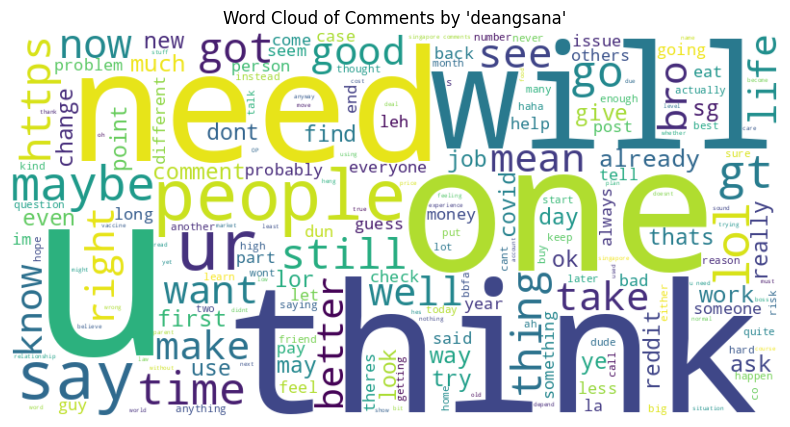

In [ ]:
# Filter for comments by the specified username
user_comments = Data[Data['username'] == 'deangsana']

# Concatenate all comment texts into a single string
comment_text = ' '.join(user_comments['text'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud of Comments by 'deangsana'")
plt.show()


### Right: Culmulative Plot of Hate Comments

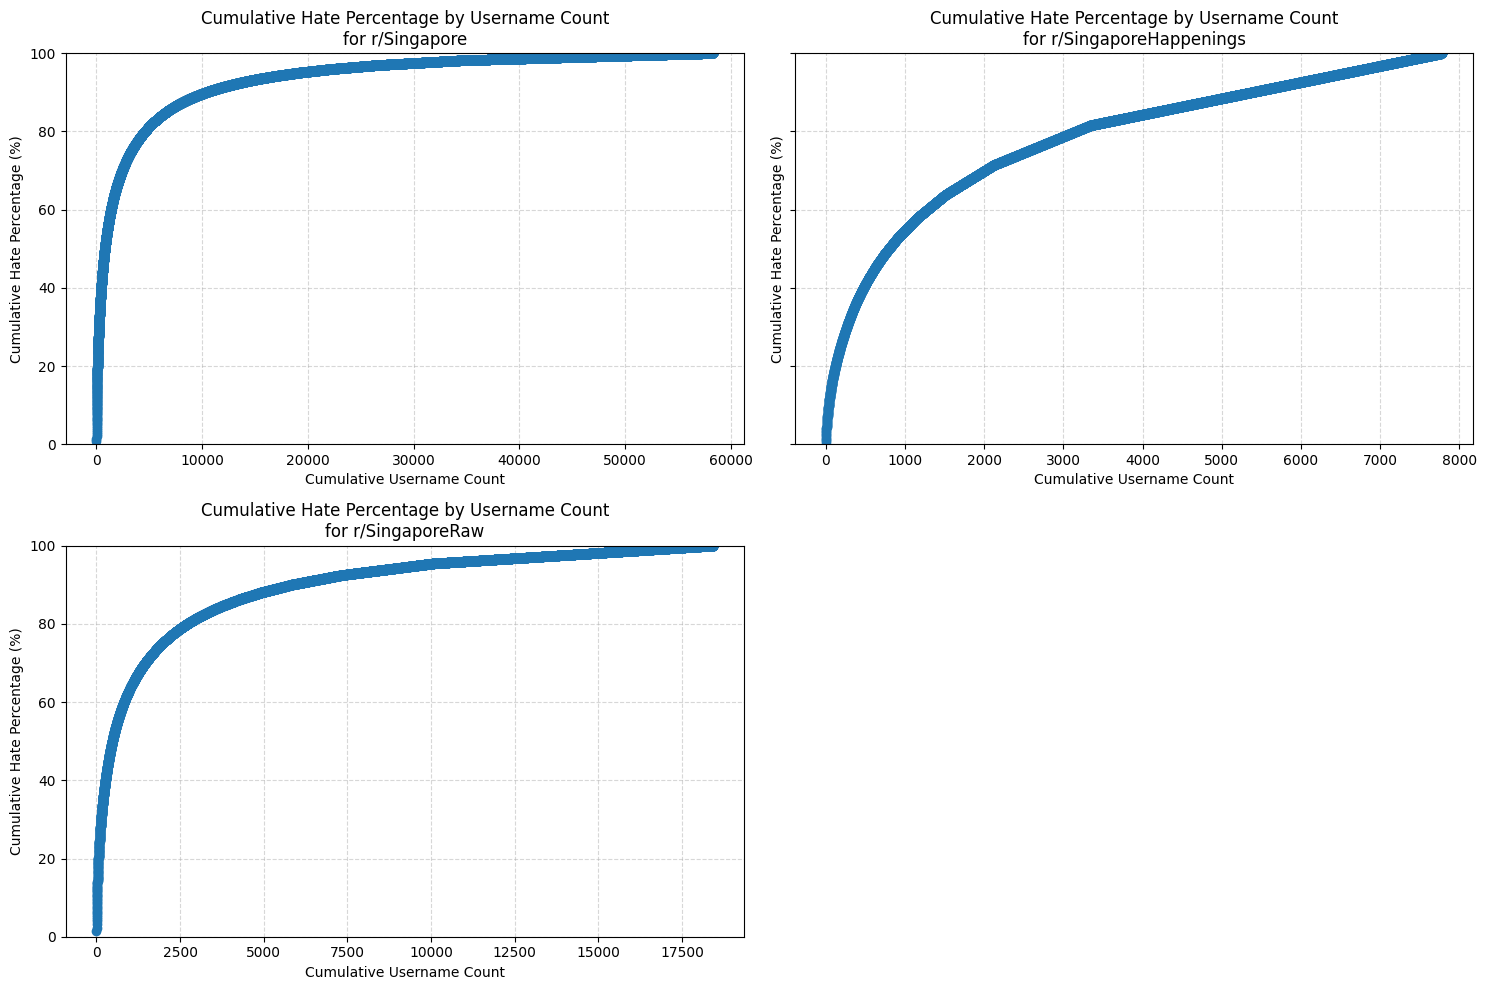

In [ ]:
# Get list of unique subreddits
subreddits = top_hate_users['subreddit'].unique()

# Set up the subplots side by side with 2 plots per row
n_cols = 2  # Number of plots per row
n_rows = (len(subreddits) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, subreddit in enumerate(subreddits):
    # Filter data for the current subreddit and sort by hate_percentage in descending order
    subreddit_data = top_hate_users[top_hate_users['subreddit'] == subreddit].sort_values(by='hate_percentage', ascending=False).reset_index(drop=True)

    # Calculate cumulative hate percentage and cumulative username count
    subreddit_data['cumulative_hate_percentage'] = subreddit_data['hate_percentage'].cumsum()
    subreddit_data['cumulative_user_count'] = range(1, len(subreddit_data) + 1)

    # Plot cumulative hate percentage vs. cumulative username count with a thinner line
    axes[i].plot(subreddit_data['cumulative_user_count'], subreddit_data['cumulative_hate_percentage'], marker='o', linestyle='-', linewidth=1)
    axes[i].set_title(f"Cumulative Hate Percentage by Username Count\nfor {subreddit}")
    axes[i].set_xlabel("Cumulative Username Count")
    axes[i].set_ylabel("Cumulative Hate Percentage (%)")
    axes[i].set_ylim(0, 100)  # Scale y-axis to 100% for clarity
    axes[i].grid(True, linestyle='--', alpha=0.5)  # Add a grid for readability

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def usernames_for_hate_percentage(threshold, subreddit_name):
    # Filter data for the specified subreddit
    subreddit_data = top_hate_users[top_hate_users['subreddit'] == subreddit_name].sort_values(by='hate_percentage', ascending=False).reset_index(drop=True)

    # Calculate cumulative hate percentage and cumulative username count
    subreddit_data['cumulative_hate_percentage'] = subreddit_data['hate_percentage'].cumsum()
    subreddit_data['cumulative_user_count'] = range(1, len(subreddit_data) + 1)

    # Find the minimum cumulative user count needed to meet or exceed the threshold
    result = subreddit_data[subreddit_data['cumulative_hate_percentage'] >= threshold].head(1)

    # Output the count or a message if the threshold is not met
    if not result.empty:
        user_count = result['cumulative_user_count'].values[0]
        print(f"{user_count} usernames are needed to reach or exceed {threshold}% hate in {subreddit_name}.")
    else:
        print(f"The cumulative hate percentage does not reach {threshold}% in {subreddit_name}.")

# Example
usernames_for_hate_percentage(threshold=50, subreddit_name="r/Singapore")


789 usernames are needed to reach or exceed 50% hate in r/Singapore.


### Bottom: Time Plot of User Behaviour

In [ ]:
def plot_user_comment_time_series_interactive(username):
    # Filter data for the specified username
    user_data = Data[Data['username'] == username].copy()

    # Ensure 'post_timestamp' is in datetime format if it's not already
    user_data['post_timestamp'] = pd.to_datetime(user_data['post_timestamp'], errors='coerce')

    # Set 'post_timestamp' as the index to enable resampling
    user_data.set_index('post_timestamp', inplace=True)

    # Resample data monthly, counting total comments and hate comments
    monthly_comment_counts = user_data.resample('M').size()  # Total comments per month
    monthly_hate_counts = user_data[user_data['BERT_2_hate'] == True].resample('M').size()  # Hate comments per month

    # Create the interactive plot
    fig = go.Figure()

    # Plot total comments
    fig.add_trace(go.Scatter(
        x=monthly_comment_counts.index,
        y=monthly_comment_counts.values,
        mode='lines+markers',
        name='Total Comments',
        line=dict(color='blue'),
        marker=dict(size=6)
    ))

    # Plot hate comments
    fig.add_trace(go.Scatter(
        x=monthly_hate_counts.index,
        y=monthly_hate_counts.values,
        mode='lines+markers',
        name='Hate Comments',
        line=dict(color='red'),
        marker=dict(size=6)
    ))

    # Update layout for better readability
    fig.update_layout(
        title=f"Monthly Comment Activity for {username}",
        xaxis_title="Month",
        yaxis_title="Number of Comments",
        hovermode="x unified",  # Shows all hover data for a specific x-axis value
        template="plotly_white",
    )

    # Show the figure
    fig.show()

# Example
plot_user_comment_time_series_interactive('deangsana')


<ipython-input-55-4c6aae968e28>:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-55-4c6aae968e28>:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

